Project 2
By: Darell Escofe - descof2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# use a matplot when ploting values rather than a dataframe

fileLocation = "C:\\Users\\Mandy\\Downloads\\CrimesChicago.csv" # CHANGE ACCORDINGLY 
df = pd.read_csv(fileLocation)
print(df)

print("Done\n")

C:\Users\Mandy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


               ID Case Number                    Date                 Block  \
0        11034701    JA366925  01/01/2001 11:00:00 AM       016XX E 86TH PL   
1        11227287    JB147188  10/08/2017 03:00:00 AM    092XX S RACINE AVE   
2        11227583    JB147595  03/28/2017 02:00:00 PM       026XX W 79TH ST   
3        11227293    JB147230  09/09/2017 08:17:00 PM  060XX S EBERHART AVE   
4        11227634    JB147599  08/26/2017 10:00:00 AM   001XX W RANDOLPH ST   
...           ...         ...                     ...                   ...   
7079488  11700926    JC279725  05/26/2019 05:13:00 PM  036XX W DOUGLAS BLVD   
7079489     24560    JC279072  05/26/2019 06:48:00 AM   013XX W HASTINGS ST   
7079490     24559    JC278908  05/26/2019 02:11:00 AM   013XX W HASTINGS ST   
7079491  11707734    JC287730  07/01/2014 07:30:00 AM   063XX S NORMAL BLVD   
7079492  11707239    JC287563  11/30/2017 09:00:00 AM   022XX S KOSTNER AVE   

         IUCR         Primary Type                 

In [68]:
# Step 1
# Cleaning the data
df.fillna("MissingValue")
print("Done cleaning...")

Done cleaning...


In [28]:
# Step 2
# Insight about crime in relation to date and time
df['Date'] = pd.to_datetime(df.Date)

Sring Crimes: 1785145
Summer Crimes: 1928455
Fall Crimes: 1776270
Winter Crimes: 1589623


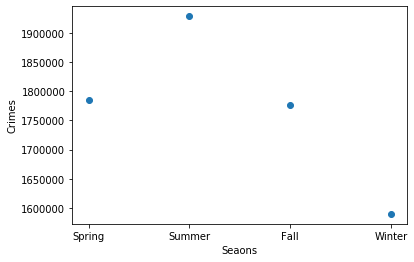

In [114]:
# Number of crimes per season

#Meteorological Seasons 
springMonths = [3,4,5] # Spring starts March 1 and ends May 31 so months 3,4,5 
springCrimes = 0

summerMonths = [6,7,8] # Summer starts June 1 and ends August 31 so months 6,7,8
summerCrimes = 0

fallMonths = [9,10,11] # Fall starts September 1 and ends November 30 so months 9,10,11
fallCrimes = 0

winterMonths = [12,1,2] # Winter starts December 1 and ends February 28 (29 on leap years) so months 12,1,2
winterCrimes = 0

monthsSeries = df['Date'].dt.month.values


for i in monthsSeries:
    if i in springMonths:
        springCrimes += 1 
    elif i in summerMonths:
        summerCrimes += 1 
    elif i in fallMonths:
        fallCrimes += 1
    elif i in winterMonths:
        winterCrimes += 1
        
print("Sring Crimes:", springCrimes)
print("Summer Crimes:", summerCrimes)
print("Fall Crimes:", fallCrimes)
print("Winter Crimes:", winterCrimes)

seasonNames = ["Spring","Summer","Fall","Winter"]
plt.scatter(seasonNames,[springCrimes,summerCrimes,fallCrimes,winterCrimes])
plt.ylabel("Crimes")
plt.xlabel("Seaons")
plt.show()
# Usually what we see is that as the weather warms up, crime increases and as the weather cools crime decreases
# Commonly there are less people outside when it is cold, thus less crimes.

In [73]:
# Number of crimes by month
print("Crimes by month")
df['Date'].dt.month.value_counts()

Crimes by month


7     655576
8     648985
5     626859
6     623894
10    614674
9     608118
4     580221
3     578065
1     567836
11    553478
12    525373
2     496414
Name: Date, dtype: int64

In [187]:
# Number of crimes during the day and night
# Day time will consist of 6am-5:59pm and night time will be 6pm-5:59am
# In miltiary time this would be 06:00-15:59 or day and 16:00-05:59 for night 
dayCrimes = 0
nightCrimes = 0

timeSeries = df['Date'].dt.hour

# Military hours lists
dayList = [6,7,8,9,10,11,12,13,14,15,16,17]
nightList = [18,19,20,21,22,23,0,1,2,3,4,5]

for i in timeSeries.values:
    if i in dayList:
        dayCrimes += 1 
    elif i in nightList:
        nightCrimes += 1 
        
print("Crimes during the day:", dayCrimes)
print("Crimes during the night:", nightCrimes)

Crimes during the day: 3627629
Crimes during the night: 3451864


In [66]:
# Number of crimes per day of the week 
print("Crimes by weekday occurence")
df['Date'].dt.weekday_name.value_counts()

Crimes by weekday occurence


Friday       1065995
Wednesday    1019724
Tuesday      1013553
Saturday     1013012
Thursday     1010042
Monday        999339
Sunday        957828
Name: Date, dtype: int64

       TotalCrimes
Years             
2001        485763
2002        486762
2003        475954
2004        469391
2005        453722
2006        448131
2007        437035
2008        427082
2009        392743
2010        370372
2011        351847
2012        336081
2013        307228
2014        275448
2015        264334
2016        269307
2017        268518
2018        267935
2019        258589
2020         33251


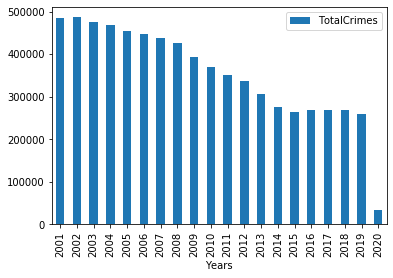

In [13]:
# Step 3
# Number of crimes per year with visual 

crimesByYear = df['Year'].value_counts().sort_index().rename_axis('Years').to_frame('TotalCrimes')

print(crimesByYear)

crimesByYear.plot.bar()

Above we can see crime from the years 2001-2020, with the x axis representing the years and the y axis representing total crimes. As we can see, there was a steady decrease of crime from the years 2001-2014 with it normalizing around ~268000 crimes per year. The year 2020 is far lower because we are only 3 months into the year.

In [186]:
# Step 4
# Calculate how many crimes actually ended with an arrest

# First calculate total number of arrests / total number of rows
totalCrimes = df.shape[0]  # gives number of row count
print("Total Crimes:", totalCrimes)
#print(df['Arrest'].value_counts())
arrestedSeries = df['Arrest'].value_counts().values # First element is false, second element is true
print("Crimes without an arrest:", arrestedSeries[0], "with",(float)(arrestedSeries[0]) / (float)(totalCrimes) * 100, "% not arrested")
print("Crimes with an arrest:", arrestedSeries[1], "with", (float)(arrestedSeries[1]) / (float)(totalCrimes) * 100, "% arrested")

# Break down each crime by its arrest % 


Total Crimes: 7079493
Crimes without an arrest: 5136433 with 72.55368428219366 % not arrested
Crimes with an arrest: 1943060 with 27.446315717806346 % arrested


In [168]:
# Step 5
# Locations with high crime
print("Top 5 wards with the most crime:")
crimesByWard = df['Ward'].value_counts().rename_axis('Ward').to_frame('TotalCrimes').head()
print(crimesByWard)

Top 5 wards with the most crime:
      TotalCrimes
Ward             
28.0       296285
42.0       266848
24.0       255160
2.0        243975
27.0       238151


starting..
Domestic crimes account for 13.281756193557928 % of all crimes in Chicago from 2001-2020
Total domestic crimes: 940281 and those with an arrest: 184715  with an overall arrest rate of: 19.64465941564277 %


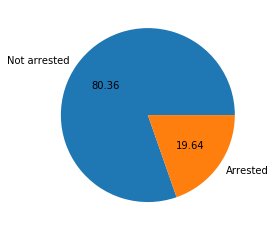

In [8]:
# Step 6
# Percentage of domestic crimes that ended in arrest with visualization
print("starting..")

domesticCountWithArrest = 0
domesticCrimeCount = 0

for index, row in df.iterrows():
    if row['Domestic']: # if domestic == true
        domesticCrimeCount += 1
    if row['Domestic'] and row['Arrest']: # if domestic == true and arrest == true
        domesticCountWithArrest += 1
print("Domestic crimes account for", (float)(domesticCrimeCount) / (float)(totalCrimes) *100,"%", "of all crimes in Chicago from 2001-2020")        
print("Total domestic crimes:", domesticCrimeCount,"and those with an arrest:", domesticCountWithArrest, " with an overall arrest rate of:", 
        (float)(domesticCountWithArrest) / (float)(domesticCrimeCount) * 100, "%")

labels = 'Not arrested', 'Arrested'
# This pie chart will display domestic crimes as a whole, with the two slice showing domestic crimes that resulted
# in an arrest and those that did not
plt.pie([domesticCrimeCount-domesticCountWithArrest, domesticCountWithArrest] , labels = labels, autopct='%.2f') 
plt.show()


Crimes on Valentine's Day 2/14: 17761
Crimes on the 4th of July 7/4: 20520
Crimes on St.Patrick's Day 3/17: 19063
Crimes on christmas 12/25: 200214
Crimes on New Years Eve 12/31: 15637
Crimes on New Years Day 1/1: 30290


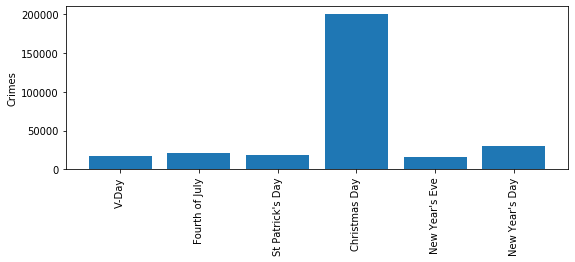

In [165]:
# Step 7 

# Check crimes by major holidays

daysSeries = df['Date'].dt.day.values

christmasDayCrimes = 0
valentineCrimes = 0
newYearsEveCrimes = 0
newYearsDayCrimes = 0
stPatricksCrimes = 0
independenceDayCrimes = 0

for i,j in zip(monthsSeries, daysSeries):
    if  i == 12 and j == 25:
        christmasCrimes += 1
    
    elif i == 2 and j == 14:
        valentineCrimes += 1
        
    elif i == 12 and j == 31:
        newYearsEveCrimes += 1
        
    elif i == 1 and j == 1:
        newYearsDayCrimes += 1
        
    elif i == 3 and j == 17:
        stPatricksCrimes += 1
    
    elif i == 7 and j == 4:
        independenceDayCrimes += 1
    
print("Crimes on Valentine's Day 2/14:", valentineCrimes)
print("Crimes on the 4th of July 7/4:", independenceDayCrimes)
print("Crimes on St.Patrick's Day 3/17:", stPatricksCrimes)
print("Crimes on christmas 12/25:", christmasCrimes)
print("Crimes on New Years Eve 12/31:", newYearsEveCrimes)
print("Crimes on New Years Day 1/1:", newYearsDayCrimes)

holidayNames = ["V-Day","Fourth of July","St Patrick's Day","Christmas Day", "New Year's Eve","New Year's Day"]
plt.figure(figsize=(9,3))
plt.bar(holidayNames, [valentineCrimes,independenceDayCrimes,stPatricksCrimes,christmasCrimes,newYearsEveCrimes,newYearsDayCrimes])
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

# Crimes that occur on St.Patrick's Day

In the graph for crimes by holidays we can see Christmas Day has much more crime compared to the other crime which was surprising.